In [59]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import os
import datetime
from datetime import date
from datetime import time
from datetime import datetime
import seaborn as sns
import scipy as sp
import random
import time
import sklearn
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 
## common model helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import feature_extraction
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns

In [ ]:
path = "H://practice//hep//hepatitis"
os.chdir(path)
os.getcwd()

## import the data

hep = pd.DataFrame(pd.read_csv("H://practice//hep//hepatitis//hepatitis.csv"))
hep.dtypes


In [ ]:

## visualizations

##
from matplotlib import pyplot as plt
sns.catplot(x = "class", y = "age", data = hep, kind = "box")
plt.show()
## 35-50 = middle age
## 50-60 = senior
## 60-80 = old
## 10-35 = young

##
from matplotlib import pyplot as plt
sns.distplot(hep['bilirubin'], hist= True, kde =True)
plt.show()

###
from matplotlib import pyplot as plt
sns.catplot(x = 'class', y = 'bilirubin', data = hep, kind = 'swarm')
plt.show()

###
from matplotlib import pyplot as plt
sns.catplot(x ='class', y ='bilirubin', data = hep, kind = 'box')
plt.show()

###
from matplotlib import pyplot as plt
sns.catplot(x ='class', y ='alk_phosphate', data = hep, kind = 'box')
plt.show()

##
from matplotlib import pyplot as plt
sns.catplot(x ='class', y ='sgot', data = hep, kind = 'box')
plt.show()

##
from matplotlib import pyplot as plt
sns.catplot(x ='class', y ='albumin', data = hep, kind = 'box')
plt.show()

##
from matplotlib import pyplot as plt
sns.catplot(x ='class', y ='protime', data = hep, kind = 'box')
plt.show()


In [ ]:
### Preprocessing of the data

hep['class'] = hep['class'].astype('category', copy = False)

## categorize columns

cols = ['sex', 'steroid', 'antivirals','fatigue', 'malaise','anorexia', 'liver_big','liver_firm','spleen_palable',
        'spiders', 'ascites','varices', 'histology']
for col in cols:
    hep[col] = hep[col].astype('category', copy = False)

## create Age group
hep["age-range"] = pd.cut(hep["age"],bins = [5,35,52,60,80], 
                          labels = ["very_young", "young", "middle-aged", "senior"], right = False)

## discretize other variables based on box plot of survival and death

hep["bili_range"] = pd.cut(hep["bilirubin"], bins= [0,1.3, 3,5,9], labels = ['low', 'high', 'very_high','outlier'])
hep["alk_range"] = pd.cut(hep["alk_phosphate"], bins = [25,120,200,250,300], labels = ['very_low', 'normal', 'high', 'very_high'])
hep["sgot_range"] = pd.qcut(hep["sgot"],q = 5, labels = ['low', 'normal', 'high', 'very_high', 'outlier'])
hep['alb_range'] = pd.cut(hep['albumin'], bins = [0,2.75, 3.75,5, 7], labels = ['low', 'fatal', 'high', 'very_high'])
hep['pro_range'] = pd.cut(hep['protime'], bins = [0,20, 35,60, 80,120], labels = ['very_low', 'low', 'fatal','normal','high'])


#Check missing values
hep.isnull().sum()
hep["pro_range"].fillna(hep["pro_range"].mode()[0], inplace = True)
hep1 = hep

#### drop cols from hep
drop_cols = ['age','bilirubin','alk_phosphate','sgot','albumin','protime']
hep.drop(drop_cols, axis = 1, inplace = True)

## dummify categorical values
cols_cat = ['sex' , 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'spleen_palable','spiders', 'ascites',
           'varices','histology','age-range', 'alk_range','sgot_range', 'bili_range','alb_range', 'pro_range' ]

hep_dum = pd.get_dummies(hep[cols_cat])
target = pd.DataFrame(hep['class'])
hep_f = pd.merge(target, hep_dum, left_index= True, right_index= True )

## train test split

train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(hep_f, hep_f["class"], random_state = 0)

In [169]:
## logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, auc, f1_score
confusion_matrix, roc_curve, precision_recall_curve, log_loss

logreg = LogisticRegression()
logreg.fit(train1_x, train1_y)
y_pred = logreg.predict(test1_x)
y_pred_prob = logreg.predict_proba(test1_x)[:,1]
[fpr, tpr, thr] = roc_curve(test1_y, y_pred_prob, pos_label = 1)
print(logreg.__class__.__name__ + "accuracy is %2.3f" % accuracy_score(test1_y, y_pred))
print(logreg.__class__.__name__ + "log_loss is %2.3f" %log_loss(test1_y, y_pred))
print(logreg.__class__.__name__ + "auc is %2.3f" % auc(fpr, tpr))

LogisticRegressionaccuracy is 0.972
LogisticRegressionlog_loss is 3.838
LogisticRegressionauc is 0.000


C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC is 1.00


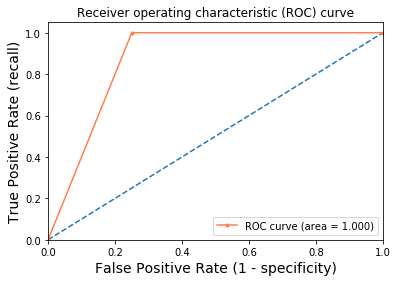

In [188]:
## plot roc curve
idx = np.min(np.where(tpr > 0.95))

## calculate auc
auc = roc_auc_score(test1_y, y_pred_prob)
[fpr, tpr, thr] = roc_curve(test1_y, y_pred, pos_label = 2)

## plot
auc = roc_auc_score(test1_y, y_pred_prob)
print('AUC is %3.2f'% auc)
import matplotlib.pyplot as plt
plt.figure()
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', color='coral', label='ROC curve (area = %0.3f)' % auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
# show the plot
plt.show()

In [186]:
## Precision Recall Curve for a classification problem

probs = logreg.predict_proba(test1_x)
probs = probs[:, 1]
## calculate precision recall curve
precision, recall, thresolds = precision_recall_curve(test1_y, probs, pos_label= 2)
## calculate f1 score
f1 = f1_score(test1_y, y_pred)
## calculate precision recall auc
#auc = auc(recall, precision)
## calculate average precision score
ap = average_precision_score(test1_y, y_pred)
print('f1 = %.3f ap = %.3f' % (f1, ap))

f1 = 0.857 ap = 0.091


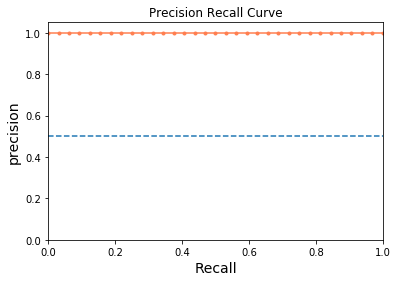

In [187]:
import matplotlib.pyplot as plt
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.', color='coral')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('precision', fontsize=14)
plt.title('Precision Recall Curve')

# show the plot
plt.show()

In [199]:
## apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=5, random_state=100)
clf_gini.fit(train1_x, train1_y)

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, auc, f1_score
confusion_matrix, roc_curve, precision_recall_curve, log_loss

pred_gini = clf_gini.predict(test1_x)

print("Accuracy for model is", accuracy_score(test1_y, pred_gini)*100)
confusion_mat = confusion_matrix(test1_y, y_pred)
print(classification_report(test1_y, y_pred))





Accuracy for model is 100.0
              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.97      1.00      0.98        32

   micro avg       0.97      0.97      0.97        36
   macro avg       0.98      0.88      0.92        36
weighted avg       0.97      0.97      0.97        36



In [205]:
## performance on training data
pred_train = clf_gini.predict(train1_x)
print("Accuracy for modelon training is", accuracy_score(train1_y, pred_train)*100)
confusion_mat = confusion_matrix(train1_y, pred_train)
confusion_mat
print(classification_report(train1_y, pred_train))

Accuracy for modelon training is 100.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        84

   micro avg       1.00      1.00      1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



In [6]:
## new problem
path = "H://practice//epi_seizure"
os.chdir(path)
os.getcwd()

## import the data
seizure = pd.read_csv("H://practice//epi_seizure//seizure.csv")

target = pd.DataFrame(seizure["y"])
target.head()
seizure.drop(['y'], axis = 1, inplace= True)
seizure.sample(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
10218,13,41,56,35,21,3,-6,-9,-4,-6,...,97,62,23,-5,-7,-9,-22,-37,-57,-43
9563,-55,-23,17,45,56,59,41,2,-15,-40,...,-10,-1,-16,-29,-25,-28,-12,18,35,25
142,-67,-74,-84,-96,-104,-107,-109,-111,-123,-130,...,-41,-47,-48,-56,-62,-65,-69,-67,-69,-58
3277,-50,-47,-50,-72,-116,-160,-177,-163,-115,-82,...,-67,-67,-53,-28,-10,-2,7,16,23,22
6451,14,22,40,49,58,53,53,47,45,40,...,20,14,22,30,43,55,66,67,72,65
3943,-56,-68,-59,-52,-24,5,43,73,95,106,...,-9,14,49,93,123,119,122,133,137,110
5753,-31,-44,-52,-61,-76,-90,-95,-87,-74,-55,...,-8,-23,-33,-37,-47,-52,-60,-68,-71,-74
6013,-6,-12,-14,-14,-24,-32,-36,-40,-37,-45,...,-64,-74,-80,-87,-94,-96,-100,-108,-111,-114
1942,32,20,7,2,-2,5,13,22,7,-3,...,-21,-32,-33,-28,-23,-3,7,21,11,11
9598,32,62,83,99,104,111,103,69,16,-28,...,46,53,44,53,70,92,92,52,10,-40


In [9]:
## preprocessing scaling

scaled = StandardScaler()
target = pd.DataFrame(seizure["y"])
seizure.drop(['y'], axis = 1, inplace= True)

In [38]:
from sklearn.preprocessing import normalize
scaled = normalize(seizure)
df1 = pd.DataFrame(scaled, columns= seizure.columns)

In [43]:
df1.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,0.104109,0.146523,0.176599,0.171972,0.148066,0.096397,0.042415,-0.006941,-0.025449,-0.029305,...,0.006169,-0.013110,-0.011568,-0.023906,-0.059381,-0.079431,-0.097939,-0.089456,-0.064008,-0.039330
1,0.061209,0.060575,0.056452,0.052488,0.050743,0.049951,0.048682,0.043132,0.038692,0.036789,...,0.026640,0.026006,0.023786,0.023152,0.024103,0.024896,0.024737,0.024420,0.022676,0.020456
2,-0.038444,-0.046854,-0.056465,-0.044451,-0.038444,-0.043250,-0.068479,-0.087701,-0.102118,-0.112930,...,0.034840,0.068479,0.076889,0.057666,0.022826,-0.014417,-0.036042,-0.042048,-0.042048,-0.043250
3,-0.111276,-0.107037,-0.101738,-0.097499,-0.094319,-0.100678,-0.108096,-0.105977,-0.092200,-0.083722,...,-0.084781,-0.086901,-0.085841,-0.084781,-0.081602,-0.090080,-0.081602,-0.076303,-0.073124,-0.068885
4,-0.017182,-0.124093,-0.187094,-0.194730,-0.148911,-0.091638,-0.030546,0.000000,-0.040092,-0.112638,...,0.019091,0.007636,0.003818,-0.022909,-0.061092,-0.078274,-0.124093,-0.158457,-0.169912,-0.139366


In [40]:
from sklearn.cluster import  KMeans
km = KMeans(n_clusters = 10, init='k-means++', n_init=10, max_iter=300, tol= 1e-04, random_state= 0)
y_km = km.fit_predict(df1)

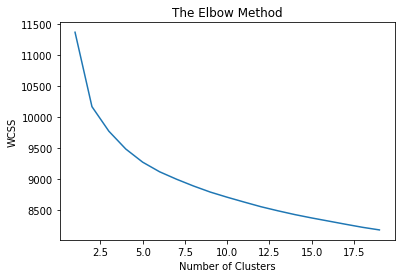

In [41]:
## elbow method: calculate number of clusters
wcss = []
for i in range(1,20):
    km = KMeans(n_clusters = i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                tol= 1e-04, 
                random_state= 40)
    km.fit(df1)
    wcss.append(km.inertia_)
    
    
## plot
import matplotlib.pyplot as plt
plt.plot(range(1,20), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

In [ ]:
data = pd.read_csv('filename')

km = KMeans(n_clusters=5).fit(data)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = km.labels_
cluster_map[cluster_map.cluster == 3]

## there are no clear clusters

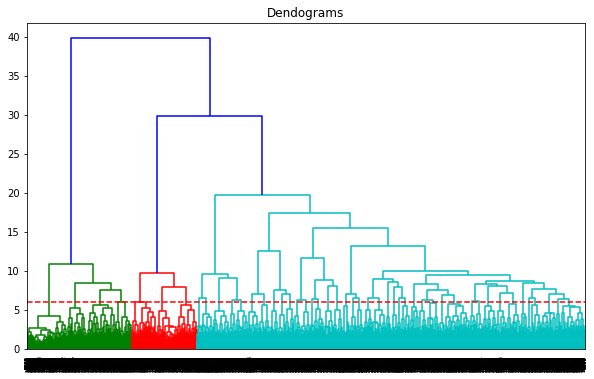

In [44]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(df1, method= 'ward'))
plt.axhline(y = 6, color = 'r', linestyle = '--')
plt.show()

In [52]:
## run PCA
from sklearn.decomposition import PCA
pca = PCA().fit(df1)


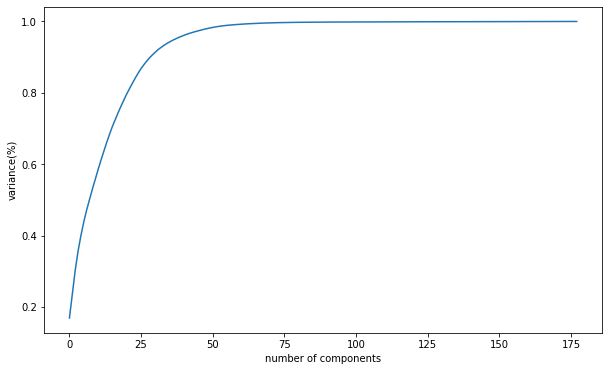

In [58]:
import matplotlib as pyplot
plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel(('variance(%)')) # for each component
plt.show()


In [56]:
pca.explained_variance_ratio_


array([1.69048633e-01, 6.74033430e-02, 6.50197906e-02, 5.45067723e-02,
       4.37501705e-02, 3.81843482e-02, 3.35057521e-02, 2.97515592e-02,
       2.87478049e-02, 2.77342806e-02, 2.71445264e-02, 2.64851415e-02,
       2.50728687e-02, 2.45641169e-02, 2.31500898e-02, 2.19474096e-02,
       1.96973507e-02, 1.89260434e-02, 1.81644717e-02, 1.72036470e-02,
       1.70550474e-02, 1.52932792e-02, 1.50828479e-02, 1.44742889e-02,
       1.36358028e-02, 1.26169322e-02, 1.09504596e-02, 1.01537283e-02,
       9.34869117e-03, 8.16202545e-03, 7.53336787e-03, 7.21584614e-03,
       6.02563394e-03, 5.65711465e-03, 5.04825944e-03, 4.66818273e-03,
       4.30331255e-03, 3.78770440e-03, 3.76102173e-03, 3.35700033e-03,
       3.21235576e-03, 2.96766381e-03, 2.68807094e-03, 2.46963489e-03,
       2.28600175e-03, 2.20326472e-03, 2.14019577e-03, 2.03194049e-03,
       1.88472286e-03, 1.72302889e-03, 1.57227132e-03, 1.47736869e-03,
       1.31543454e-03, 1.13366818e-03, 1.01983480e-03, 8.85871476e-04,
      